## <div style = 'text-align: center'>Индивидуальное домашнее задание по статистическому анализу №3</div>

Выполнил: Ибатов Николай Эдуардович

Вариант 5.

**1.** 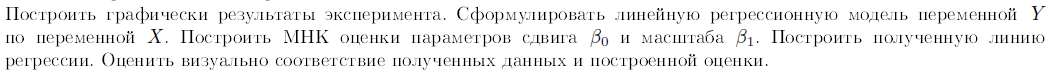

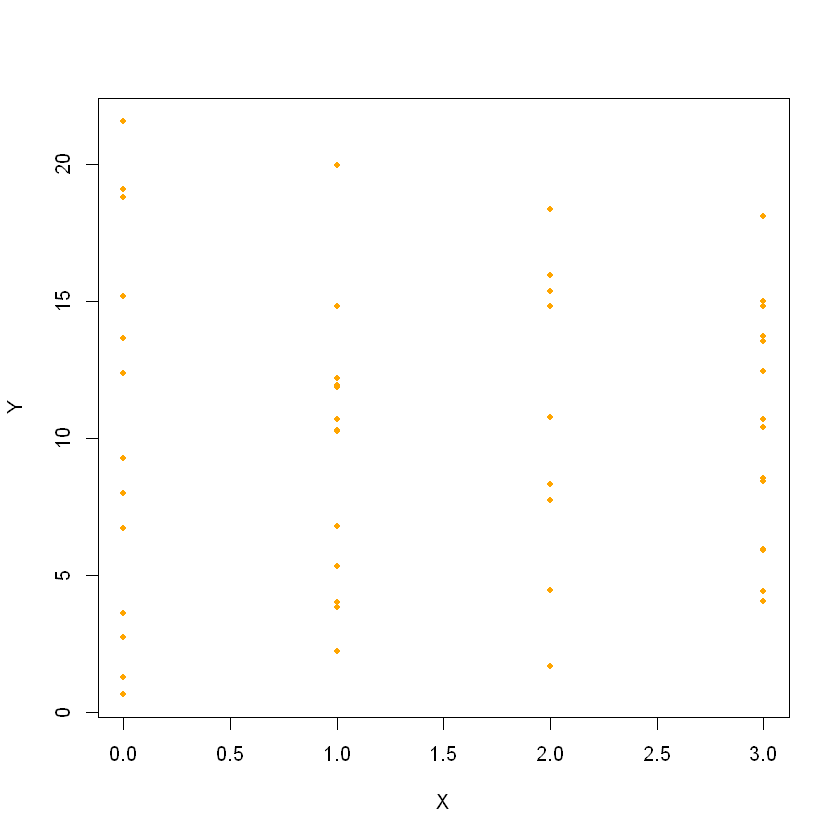

In [59]:
X<-c(0,2,2,1,1,1,0,2,3,3,3,2,3,1,1,1,3,2,1,1,0,3,0,2,0,0,1,3,1,2,3,3,0,0,0,0,3,1,3,2,3,2,3,0,1,3,0,1,2,0)
Y<-c(13.66,15.95,8.34,11.93,5.34,14.84,6.73,1.70,18.13,12.45,4.07,18.38,14.82,10.28,2.25,10.32,5.91,8.35,3.86,19.97,19.11,15.03,12.40,14.83,1.28,15.19,6.81,8.56,4.03,7.75,13.73,13.57,9.29,18.80,3.62,21.59,8.43,10.72,5.97,10.76,10.70,4.47,10.42,2.73,12.20,4.42,7.99,11.89,15.39,0.66)
plot(X,Y,col="orange",pch=20)

Модель линейной регрессии
$\begin{pmatrix}
  y_{1}\\
  y_{2}\\
  \vdots\\
  y_{50} 
 \end{pmatrix} = 
 \begin{pmatrix}
  1 & x_{1}\\
  1 & x_{2}\\
  \vdots  & \vdots\\
  1 & x_{50} 
 \end{pmatrix}
 \begin{pmatrix}
  \beta_0\\
  \beta_1 
 \end{pmatrix} + \begin{pmatrix}
  \varepsilon_{1}\\
  \varepsilon_{2}\\
  \vdots\\
  \varepsilon_{50} 
 \end{pmatrix}$
 
Оценка по МНК:   
$
\widehat{\beta}=(XX^T)^{-1}XY
$

,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X,0,2,2,1,1,1,0,2,3,3,⋯,3,2,3,0,1,3,0,1,2,0


,9.956009
X,0.157594


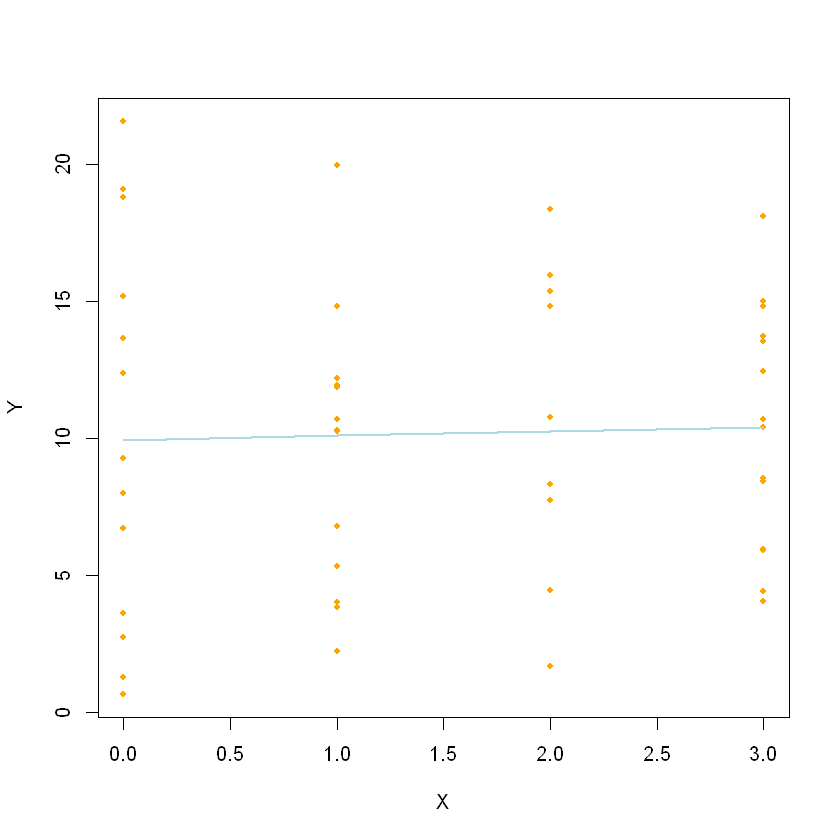

In [60]:
Xm<-rbind(rep(1,50),X)
Xm
XXT.inv<-solve(Xm %*% t(Xm))
beta<- XXT.inv %*% Xm %*% as.matrix(Y)
beta

x.range<-0:3
y_<-beta[2,1]*x.range+beta[1,1]

plot(X, Y,col="orange",pch=20)
lines(x.range,y_, col="lightblue",lwd=2)

**2.** 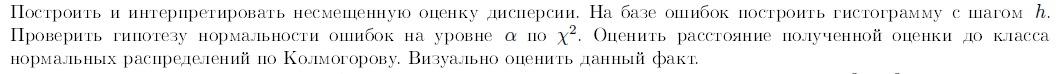

h = 2.8

Несмещенная оценка:
$$\widehat{\sigma^2}=\frac{||Y-X^T\widehat{\beta}||}{n-r}=\frac{||Y-X^T\widehat{\beta}||}{48}$$

[1] 4.651567

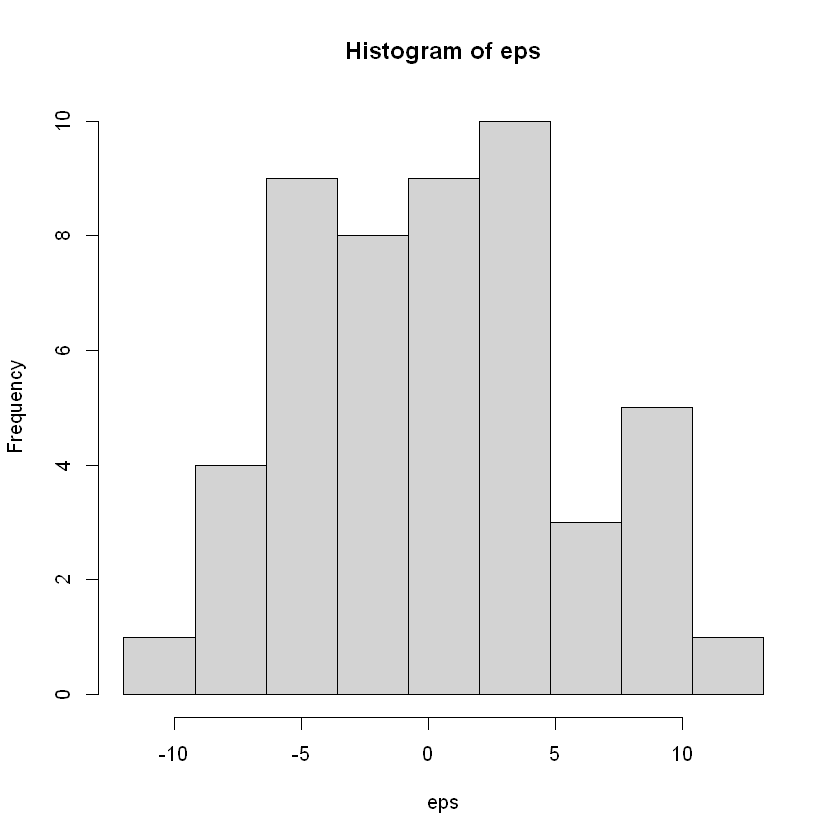

In [61]:
eps<-(Y-t(Xm) %*% beta)
un<-norm(eps)/48
un

eps<-sort(eps)
hist(eps,breaks = seq(-12,15,2.80))

[1] -12.0  -9.2  -6.4  -3.6  -0.8   2.0   4.8   7.6  10.4  13.2

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"неправильные AREAS на графике -- лучше используйте 'freq=FALSE'"


[1] 0.7239734
[1] 5.648305


[1] 7.814728

[1] TRUE

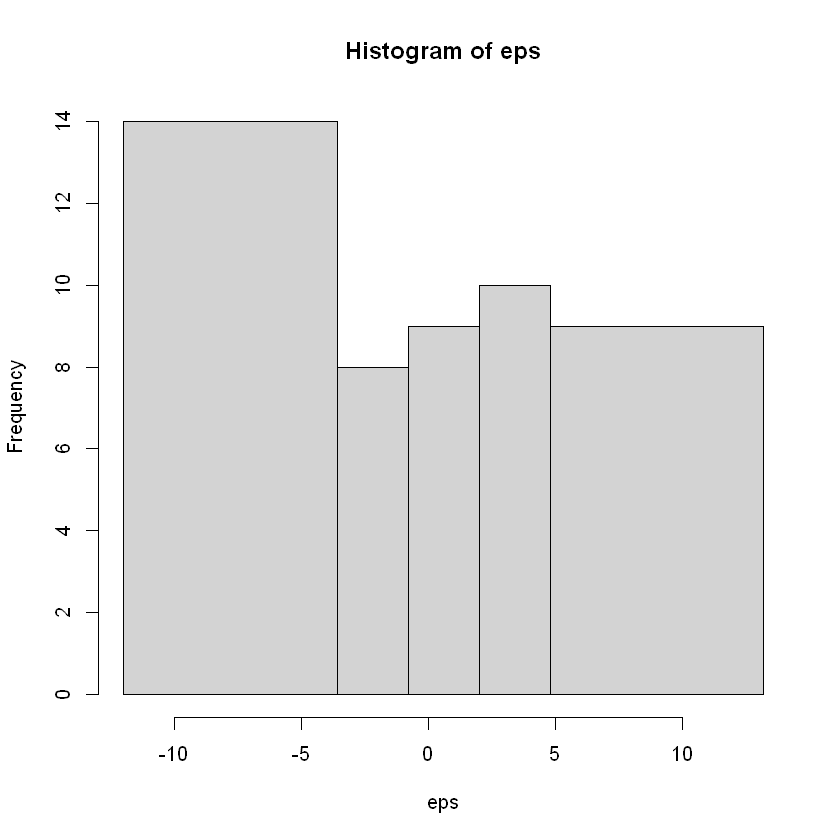

In [63]:
a1 <- 0.05
n<-length(eps)
seq(-12,15,2.80)
#-12,-6.4,-3.6,-0.8,2,4.8,7.6,10.4,13,2
hist<-hist(eps,breaks = c(-12,-3.6,-0.8,2,4.8,13.2),freq=TRUE)
r<-5
nu<-hist$counts
borders<-c(-3.6,-0.8,2,4.8,13.2)
f1<-function (params){
        a<-0
    s<-params[1]
p0<-array(dim=r)
p0[1]<-pnorm(borders[1],a,s)

p0[r]<-1-pnorm(borders[r-1],a,s)
p0[2:(r-1)]<-pnorm(borders[2:(r-1)],a,s)-pnorm(borders[1:(r-2)],a,s)
f<-sum((nu-n*p0)^2/(n*p0))
}
X2<-nlm(f1,sqrt(var(eps)))
print(X2$minimum)
print(X2$estimate)

x.a1<-qchisq (1-a1, r-2)
x.a1
X2$minimum<=x.a1

Критерий в таблице Колмогорова равен 1.36

$D_n=\sqrt{n}sup|F_n(y)-F(y)|$

In [64]:
i<-1:n
v2<-(i-1)/n
v3<-i/n

ks <- function(p){
  p0 <- pnorm(eps, 0, p)
  return(max(abs(v2-p0), abs(v3-p0)))
}

sqrt(n)*nlm(ks,sqrt(var(eps)))$minimum

[1] 0.4359091

0.44 < 1.36 - Гипотеза принимается 

**3.** 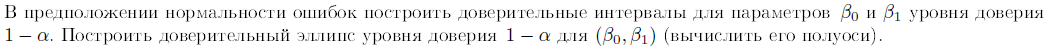

Доверительный интервал для $\beta_0$

Стандартное нормальное распределение:
$$A=(XX^T)^{-1}$$
$$\widehat{\beta} \sim N(\beta, A\sigma^2)$$
$$\widehat{\beta_0} \sim N(\beta_0, A_{11}\sigma^2)$$
$$\frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}\sigma^2}} \sim N(0, 1)$$

$\chi^2$:
$$\frac{(n-r)S^2}{\sigma^2} \sim \chi_{n-r}^2$$
Распределение Cтьюдента:
$$\frac{\frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}\sigma^2}}}{\sqrt{\frac{1}{n-r}\frac{(n-r)S^2}{\sigma^2}}} \sim S_{n-r}$$

Получаем:

$$\frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}S^2}} \sim S_{48}$$

$$P(-X_{\alpha/2} < \frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}S^2}} < X_{\alpha/2} ) = 1 -\alpha$$

$$P(\widehat{\beta_0}-X_{\alpha/2}\sqrt{A_{11}S^2} < \beta_0 < \widehat{\beta_0}+X_{\alpha/2}\sqrt{A_{11}S^2} ) = 1 -\alpha$$

Аналогично для $\beta_1$:
$$P(\widehat{\beta_1}-X_{\alpha/2}\sqrt{A_{22}S^2} < \beta_1 < \widehat{\beta_1}+X_{\alpha/2}\sqrt{A_{22}S^2} ) = 1 -\alpha$$

In [65]:
b0<- qt(1-0.025,48)*sqrt(XXT.inv[1,1]*un)
b0.l<-beta[1,1] - b0
b0.r<-beta[1,1] + b0

cat(b0.l,"< beta0 <",b0.r,"\n")

b1<- qt(1-0.025,48)*sqrt(XXT.inv[2,2]*un)
b1.l<-beta[2,1] - b1
b1.r<-beta[2,1] + b1

cat(b1.l,"< beta1 <",b1.r)

8.949857 < beta0 < 10.96216 
-0.3741738 < beta1 < 0.6893617

Доверительный эллипс уровня доверия $1-\alpha$:
$$\{\Psi:(\widehat{\Psi}-\Psi)^T(C^T(XX^T)^{-1}C)^{-1}(\widehat{\Psi}-\Psi) \le qS^2x_\alpha\}$$

$$С = \begin{pmatrix}
  1 & 0 \\
  0 & 1 
 \end{pmatrix}$$

 $$XX^T = PDP^T\$$
 
 $$A=\begin{pmatrix}
  x  \\
  y 
 \end{pmatrix} = P^T(\widehat{\Psi}-\Psi)=\begin{pmatrix}
  0.417 & 0.909 \\
  -0.909 & 0.417 
 \end{pmatrix}\begin{pmatrix}
  9.956 - \beta_0\\
  0.158 - \beta_1
 \end{pmatrix}$$
 
 $A^TDA \le qS^2x_\alpha$
 
 Получаем:
 $$213.42x^2+15.58y^2 \le 29.68$$
 
 полуоси 0.373 и 1.3802

In [66]:
XXT<-Xm %*% t(Xm)
ei<-eigen(XXT)
P<-ei$vectors
PT<-t(P)
PT
D <- diag(ei$values)
D

qS2xa<-2*un*qf(1-0.05,2,48)
qS2xa

0.4171095,0.9088562
-0.9088562,0.4171095


213.4204,0.00000
0.0000,15.57958


[1] 29.68376

**4.**

Чтобы переменная Y была независима от переменной Х, коэффициент  $\beta_1$  должен равняться 0.

$H_0: \phi = 0$
$H_A: \phi \neq 0$
$$\phi =\begin{pmatrix} 0 & 1\end{pmatrix}\cdot \begin{pmatrix} \beta_0 \\ \beta_1\end{pmatrix}=\beta_1$$

$F = \frac{\hat{\phi}^T(C^T(XX^T)^{-1}C)^{-1}\hat{\phi}}{qS^2}$

In [67]:
C<-c(0,1)
F<- (beta[2,1]* solve(t(C) %*% XXT.inv %*% C) * beta[2,1])/(un)
F
print(qf(1-0.05, 1, 48))

0.3550599


[1] 4.042652


Гипотеза принимается, следовательно Y не зависит от X

**5.** 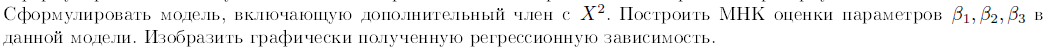

Модель регрессии
$\begin{pmatrix}
  y_{1}\\
  y_{2}\\
  \vdots\\
  y_{50} 
 \end{pmatrix} = 
 \begin{pmatrix}
  1 & x_{1} & x_1^2\\
  1 & x_{2} & x_1^2\\
  \vdots  & \vdots& \vdots\\
  1 & x_{50}  & x_{50}^2
 \end{pmatrix}
 \begin{pmatrix}
  \beta_0\\
  \beta_1 \\
  \beta_2
 \end{pmatrix} + \begin{pmatrix}
  \varepsilon_{1}\\
  \varepsilon_{2}\\
  \vdots\\
  \varepsilon_{50} 
 \end{pmatrix}$
 
Оценка по МНК:   
$
\widehat{\beta}=(XX^T)^{-1}XY
$

,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
X,0,2,2,1,1,1,0,2,3,3,⋯,3,2,3,0,1,3,0,1,2,0
X2,0,4,4,1,1,1,0,4,9,9,⋯,9,4,9,0,1,9,0,1,4,0


,10.1086631
X,-0.3130583
X2,0.1545599


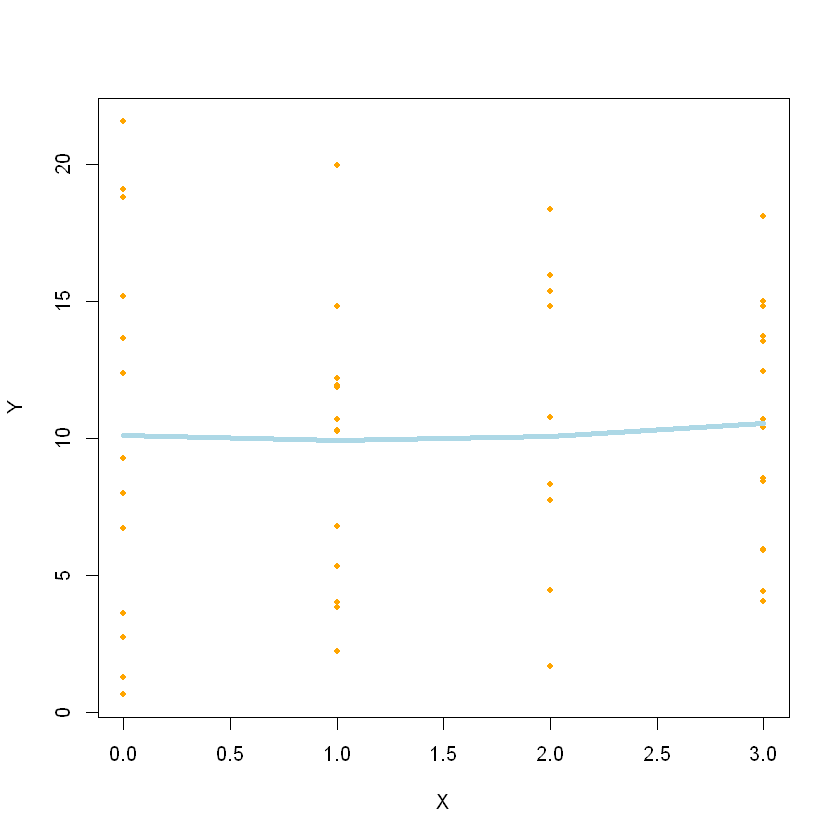

In [68]:
X2<-X^2
Xm<-rbind(rep(1,50),X,X2)
Xm
XXT.inv<-solve(Xm %*% t(Xm))
beta<- XXT.inv %*% Xm %*% as.matrix(Y)
beta

x.range<-0:3
y__<-beta[3,1]*x.range^2+beta[2,1]*x.range+beta[1,1]

plot(X, Y,col="orange",pch=20)
lines(x.range,y__, col="lightblue",lwd=4)

**6.**

$$h=2.80$$

Несмещенная оценка:
$$\widehat{\sigma^2}=\frac{||Y-X^T\widehat{\beta}||}{n-r}=\frac{||Y-X^T\widehat{\beta}||}{47}$$

[1] 4.764216

[1] -12.0  -9.2  -6.4  -3.6  -0.8   2.0   4.8   7.6  10.4  13.2

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
"неправильные AREAS на графике -- лучше используйте 'freq=FALSE'"


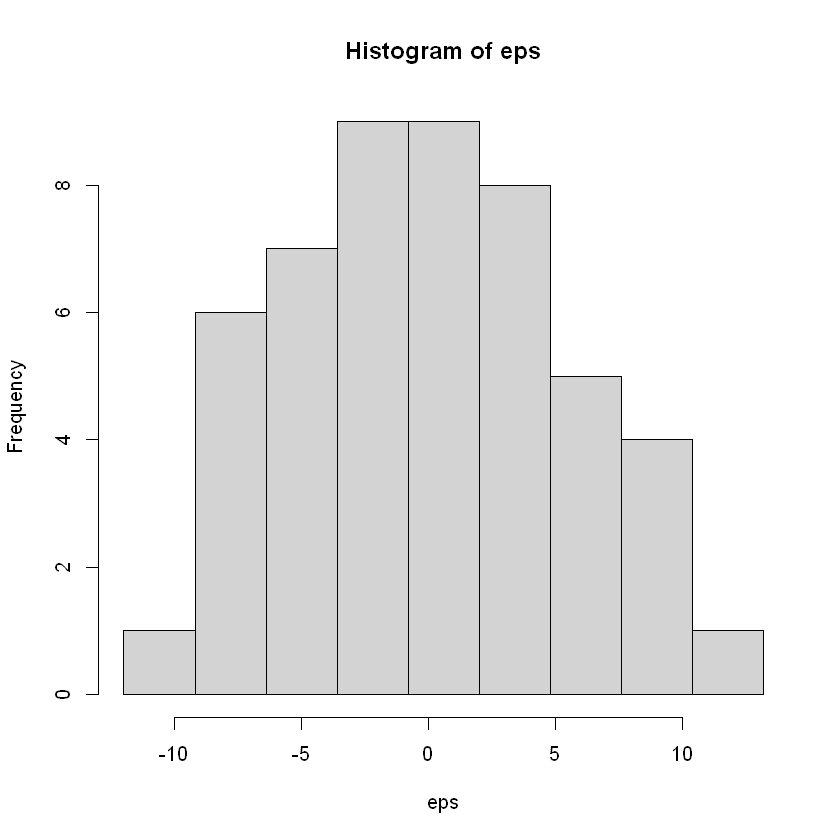

[1] 0.04900652
[1] 5.899595


[1] 7.814728

[1] TRUE

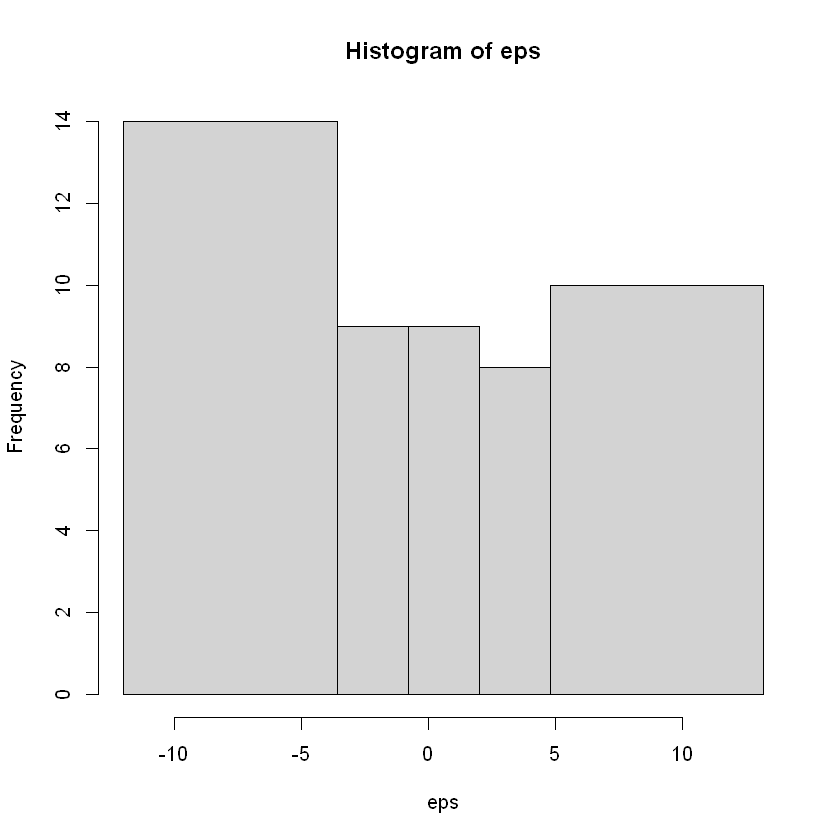

In [69]:
eps<-(Y-t(Xm) %*% beta)
un<-norm(eps)/47
un

eps<-sort(eps)

hist(eps,breaks = seq(-12,15,2.80))

a1 <- 0.05
n<-length(eps)
seq(-12,15,2.80)
hist<-hist(eps,breaks = c(-12,-3.6,-0.8,2,4.8,13.2),freq=TRUE)
r<-5
nu<-hist$counts
borders<-c(-3.6,-0.8,2,4.8,13.2)
f1<-function (params){
        a<-0
    s<-params[1]
p0<-array(dim=r)
p0[1]<-pnorm(borders[1],a,s)

p0[r]<-1-pnorm(borders[r-1],a,s)
p0[2:(r-1)]<-pnorm(borders[2:(r-1)],a,s)-pnorm(borders[1:(r-2)],a,s)
f<-sum((nu-n*p0)^2/(n*p0))
}
X2<-nlm(f1,sqrt(var/(eps)))
print(X2$minimum)
print(X2$estimate)

x.a1<-qchisq (1-a1, r-2)
x.a1
X2$minimum<=x.a1

По Колмогорову:

In [70]:
i<-1:n
v2<-(i-1)/n
v3<-i/n

ks <- function(p){
  p0 <- pnorm(eps, 0, p)
  return(max(abs(v2-p0), abs(v3-p0)))
}

sqrt(n)*nlm(ks,sqrt(var(eps)))$minimum

Warning message in pnorm(eps, 0, p):
"созданы NaN"
Warning message in nlm(ks, sqrt(var(eps))):
"NA/Inf заменены максимальным положительным значением"
Warning message in pnorm(eps, 0, p):
"созданы NaN"
Warning message in nlm(ks, sqrt(var(eps))):
"NA/Inf заменены максимальным положительным значением"


[1] 0.4084174

**7.**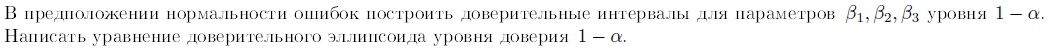

$$\frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}S^2}} \sim S_{47}$$

$$P(-X_{\alpha/2} < \frac{\widehat{\beta_0}-\beta_0}{\sqrt{A_{11}S^2}} < X_{\alpha/2} ) = 1 -\alpha$$

$$P(\widehat{\beta_0}-X_{\alpha/2}\sqrt{A_{11}S^2} < \beta_0 < \widehat{\beta_0}+X_{\alpha/2}\sqrt{A_{11}S^2} ) = 1 -\alpha$$

Аналогично для $\beta_1$:
$$P(\widehat{\beta_1}-X_{\alpha/2}\sqrt{A_{22}S^2} < \beta_1 < \widehat{\beta_1}+X_{\alpha/2}\sqrt{A_{22}S^2} ) = 1 -\alpha$$

$\beta_2$:
$$P(\widehat{\beta_2}-X_{\alpha/2}\sqrt{A_{33}S^2} < \beta_2 < \widehat{\beta_2}+X_{\alpha/2}\sqrt{A_{33}S^2} ) = 1 -\alpha$$

In [72]:
b0<- qt(1-0.025,47)*sqrt(XXT.inv[1,1]*un)
b0.l<-beta[1,1] - b0
b0.r<-beta[1,1] + b0

cat(b0.l,"< beta0 <",b0.r,"\n")

b1<- qt(1-0.025,47)*sqrt(XXT.inv[2,2]*un)
b1.l<-beta[2,1] - b1
b1.r<-beta[2,1] + b1

cat(b1.l,"< beta1 <",b1.r,"\n")

b2<- qt(1-0.025,47)*sqrt(XXT.inv[3,3]*un)
b2.l<-beta[3,1] - b2
b2.r<-beta[3,1] + b2

cat(b2.l,"< beta2 <",b2.r)

8.918021 < beta0 < 11.29931 
-2.287545 < beta1 < 1.661428 
-0.4692744 < beta2 < 0.7783942

Доверительный эллипс уровня доверия $1-\alpha$:
$$\{\Psi:(\widehat{\Psi}-\Psi)^T(C^T(XX^T)^{-1}C)^{-1}(\widehat{\Psi}-\Psi) \le qS^2x_\alpha\}$$

$$С = \begin{pmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0\\
  0 & 0 & 1\\
 \end{pmatrix}$$

 $$XX^T = PDP^T\$$
 
 $$A=\begin{pmatrix}
  x  \\
  y \\
  z
 \end{pmatrix} = P^T(\widehat{\Psi}-\Psi)=\begin{pmatrix}
  -0.13 & -0.34 & -0.93 \\
 0.9 & 0.35 & -0.26 \\
  0.42 & -0.87 & 0.26 
 \end{pmatrix}\begin{pmatrix}
  10.1 - \beta_0\\
  -0.3 - \beta_1\\
   0.2 - \beta_2
 \end{pmatrix}$$
 
 $A^TDA \le qS^2x_\alpha$
 
 Получаем:
 $$1503.7x^2+28.5y^2 + 3.84z^2 \le 26.7$$

In [73]:
XXT<-Xm %*% t(Xm)
ei<-eigen(XXT)
P<-ei$vectors
PT<-t(P)
PT
D <- diag(ei$values)
D

qS2xa<-2*un*qf(1-0.05,3,47)
qS2xa

-0.1321857,-0.3387131,-0.9315581
0.8994834,0.3538873,-0.2563073
0.4164812,-0.8718012,0.2578879


1503.655,0.0000,0.000000
0.000,28.5016,0.000000
0.000,0.0000,3.843893


[1] 26.70205

**8.**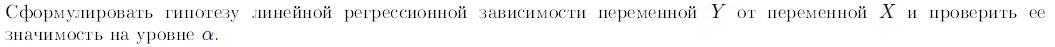

Чтобы переменная Y линейно зависела от переменной Х, коэффициент  β3 должен равняться 0.

$H_0: \phi = 0$

$H_A: \phi \neq 0$
$$\phi =\begin{pmatrix} 0 & 0 & 1\end{pmatrix}\cdot \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_3 \end{pmatrix}=\beta_3$$

$F = \frac{\hat{\phi}^T(C^T(XX^T)^{-1}C)^{-1}\hat{\phi}}{qS^2}$

In [74]:
C<-c(0,0,1)
F<- (beta[3,1]* solve(t(C) %*% XXT.inv %*% C) * beta[3,1])/(2*un)
F
print(qf(1-0.05, 2, 47))

0.1242136


[1] 3.195056


Гипотеза принимается, поэтому Y зависит от X линейно.